# Model Training

### Importing required packages

In [111]:
import numpy as np
import scipy
import pandas as pd
import random 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR 
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor


### Importing data

In [4]:
df = pd.read_csv('data/body_fat.csv')

### Show top 5 records 

In [5]:
df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Dropping unnecessary columns

In [6]:
df.drop(columns = 'Original', inplace = True)

In [7]:
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Adding BMI Column

In [8]:
df['BMI'] = df['Weight'] / (df['Height'] * df['Height'])

In [9]:
df.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042


### Removing Outliers

In [10]:
outlier_indices = {30, 38, 40, 41, 85, 215}

In [11]:
df = df.drop(outlier_indices)
df.reset_index(inplace = True, drop=True)
df.head()
[5, 2, 10, 11, 14, 8, 7, 0, 4, 12]

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,12.3,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.651298
1,6.1,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.213020
2,25.3,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.748441
3,10.4,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.751890
4,28.7,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.512042


### Creating feature and target matrix 

In [12]:
X_df = df.drop(columns = ['BodyFat'])
y_df = df['BodyFat']

In [13]:
numerical_features = [feature for feature in X_df.columns if X_df[feature].dtype != 'object']
categorical_features = [feature for feature in X_df.columns if X_df[feature].dtype == 'object']

In [14]:
pre_processor = ColumnTransformer(
    [
        ('OneHotEncoder', OneHotEncoder(), categorical_features),
        ('StandardScaler', StandardScaler(), numerical_features)
    ]
)

In [15]:
X = pre_processor.fit_transform(X_df)
y = y_df.to_numpy()

In [16]:
print(f'Shape of feature matrix = {X.shape}')
print(f'Shape of target matrix = {y.shape}')

Shape of feature matrix = (430, 16)
Shape of target matrix = (430,)


### Dividing data into train and test dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

### Evaluation 

In [18]:
def evaluate_model(true_values, predicted_values):
    mae = mean_absolute_error(y_true=true_values, y_pred=predicted_values)
    rmse = root_mean_squared_error(y_true=true_values, y_pred=predicted_values)
    r2 = r2_score(y_true=true_values, y_pred=predicted_values)
    return mae, rmse, r2 

### Models

In [26]:
def model_training(model_name, regressor):
    regressor.fit(X_train, y_train)
    
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    train_mae, train_rmse, train_r2 = evaluate_model(true_values=y_train, predicted_values=y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(true_values=y_test, predicted_values=y_test_pred)
    
    print(model_name)
    print('-'*30)
    print('Performance on training set')
    print(f'MAE : {train_mae}')
    print(f'RMSE : {train_rmse}')
    print(f'R2 Score : {train_r2}')
    print()
    
    print('Performance on test set')
    print(f'MAE : {test_mae}')
    print(f'RMSE : {test_rmse}')
    print(f'R2 Score : {test_r2}')
    return test_mae, test_rmse, test_r2
    

In [27]:
model_r2_score = {}

#### 1. Linear Regression

In [28]:
model_name = 'Linear Regression'
model = LinearRegression()
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Linear Regression
------------------------------
Performance on training set
MAE : 3.108443113744442
RMSE : 3.8071583856447715
R2 Score : 0.729333671746465

Performance on test set
MAE : 3.482421018788135
RMSE : 4.333071530935458
R2 Score : 0.6437037231273861


In [21]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, scoring = 'r2', cv=5))

0.6839698229697456

In [29]:
model_r2_score['Linear Regression'] = test_r2

#### 2. Ridge

In [33]:
model = Ridge()
param_distributions = {
    'alpha' : scipy.stats.loguniform(0.0001, 1000.0)
}
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 100)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177BA02B2B0>},
                   random_state=42, scoring='r2', verbose=2)

In [36]:
rs.best_score_

0.686004531967046

In [35]:
rs.best_params_

{'alpha': 0.47129737561107793}

In [41]:
model = rs.best_estimator_
model_name = 'Ridge'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Ridge
------------------------------
Performance on training set
MAE : 3.109194874543625
RMSE : 3.8154506368724177
R2 Score : 0.7281533281780554

Performance on test set
MAE : 3.4828647858878954
RMSE : 4.345905438987517
R2 Score : 0.6415900052204521


In [42]:
model_r2_score['Ridge Regression'] = test_r2

In [43]:
model_r2_score

{'Linear Regression': 0.6437037231273861,
 'Ridge Regression': 0.6415900052204521}

#### 3. Lasso 

In [44]:
model = Lasso()
param_distributions = {
    'alpha' : scipy.stats.loguniform(0.0001, 1000.0)
}
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 100)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.017e+02, tolerance: 1.842e+00
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(estimator=Lasso(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FDF81C90>},
                   random_state=42, scoring='r2', verbose=2)

In [45]:
rs.best_score_

0.6841040540145175

In [46]:
rs.best_params_

{'alpha': 0.0012363188277052211}

In [47]:
model = rs.best_estimator_
model_name = 'Lasso'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Lasso
------------------------------
Performance on training set
MAE : 3.108913554997584
RMSE : 3.807512488557744
R2 Score : 0.7292833201809292

Performance on test set
MAE : 3.480882419045698
RMSE : 4.333205854995267
R2 Score : 0.6436816326062056


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.017e+02, tolerance: 1.842e+00
  model = cd_fast.enet_coordinate_descent(


In [48]:
model_r2_score['Lasso Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.6437037231273861,
 'Ridge Regression': 0.6415900052204521,
 'Lasso Regression': 0.6436816326062056}

#### 4. ElasticNet

In [49]:
model = ElasticNet()
param_distributions = {
    'alpha' : scipy.stats.loguniform(0.0001, 1000.0),
    'l1_ratio' : scipy.stats.uniform(0.0, 1.0)
}
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 100)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.750e+00, tolerance: 1.842e+00
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(estimator=ElasticNet(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FDF4E5F0>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FDF4FC40>},
                   random_state=42, scoring='r2', verbose=2)

In [50]:
rs.best_score_

0.6859045306875302

In [51]:
rs.best_params_

{'alpha': 0.0018740223688836334, 'l1_ratio': 0.18340450985343382}

In [52]:
model = rs.best_estimator_
model_name = 'ElasticNet'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

ElasticNet
------------------------------
Performance on training set
MAE : 3.1096292665911025
RMSE : 3.8173498545839273
R2 Score : 0.7278826264646906

Performance on test set
MAE : 3.483689408610093
RMSE : 4.348517211182168
R2 Score : 0.6411590862541661


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.750e+00, tolerance: 1.842e+00
  model = cd_fast.enet_coordinate_descent(


In [53]:
model_r2_score['ElasticNet Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.6437037231273861,
 'Ridge Regression': 0.6415900052204521,
 'Lasso Regression': 0.6436816326062056,
 'ElasticNet Regression': 0.6411590862541661}

#### 5. Support Vector Regression

In [58]:
model = SVR()
param_distributions = [
    {
        'kernel' : ['linear'],
        'degree' : [1, 2, 3, 4, 5],
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    {
        'kernel' : ['rbf', 'poly', 'sigmoid'],
        'gamma'  : ['scale','auto'],
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    {
        'kernel' : ['rbf', 'poly', 'sigmoid'],
        'gamma'  : scipy.stats.loguniform(0.0001, 1000.0),
        'C'      : scipy.stats.loguniform(0.0001, 1000.0),
    },
    
]
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 1000)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(estimator=SVR(), n_iter=1000, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FAD5EC20>,
                                         'degree': [1, 2, 3, 4, 5],
                                         'kernel': ['linear']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FBE5EB60>,
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['rbf', 'poly', 'sigmoid']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FDF82410>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FDF822C0>,
                                         'kernel': ['rbf', 'poly', 'sigmoid']}],
                   random_state=42, scoring='r2', verbose=2)

In [59]:
rs.best_score_

0.675434613868792

In [60]:
model = rs.best_estimator_
model_name = 'SVR'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

SVR
------------------------------
Performance on training set
MAE : 2.9652023449142297
RMSE : 3.782336491639572
R2 Score : 0.7328515445373747

Performance on test set
MAE : 3.483770472501116
RMSE : 4.343287433570996
R2 Score : 0.6420216927919418


In [61]:
model_r2_score['Support Vector Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.6437037231273861,
 'Ridge Regression': 0.6415900052204521,
 'Lasso Regression': 0.6436816326062056,
 'ElasticNet Regression': 0.6411590862541661,
 'Support Vector Regression': 0.6420216927919418}

#### 6. K Nearest Neighbors Regression 

In [66]:
model = KNeighborsRegressor()
param_distributions = [
    {
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'weights'     : ['uniform', 'distance'],
        'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    
]
gs = GridSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, cv=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='r2', verbose=2)

In [69]:
gs.best_score_

0.609382566776919

In [71]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [72]:
model = gs.best_estimator_
model_name = 'K Nearest Neighbors Regression'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

K Nearest Neighbors Regression
------------------------------
Performance on training set
MAE : 3.991290811421802e-07
RMSE : 9.595497189054842e-07
R2 Score : 0.9999999999999828

Performance on test set
MAE : 3.9528197844277595
RMSE : 4.970128885192588
R2 Score : 0.5312353332356334


In [73]:
model_r2_score['K Nearest Neighbors Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.6437037231273861,
 'Ridge Regression': 0.6415900052204521,
 'Lasso Regression': 0.6436816326062056,
 'ElasticNet Regression': 0.6411590862541661,
 'Support Vector Regression': 0.6420216927919418,
 'K Nearest Neighbors Regression': 0.5312353332356334}

#### 7. Random Forest Regressor

In [88]:
model = RandomForestRegressor()
param_distributions = [
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'max_features' : ['sqrt', 'log2', None]
    },
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [None],
        'max_features' : ['sqrt', 'log2', None]
    }   
]
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 200)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions=[{'criterion': ['squared_error',
                                                       'absolute_error',
                                                       'friedman_mse',
                                                       'poisson'],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                                        {'criterion': ['squared_error',
                                                       'absolute_error',
                                                       'friedman_mse',
                                                       'poisson'],
                                         'max_depth': [None],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]}],
                   random_state=42, scoring='r2', verbose=2)

In [89]:
rs.best_score_

0.6296901209799568

In [90]:
rs.best_params_

{'n_estimators': 108,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'friedman_mse'}

In [91]:
model = rs.best_estimator_
model_name = 'Random Forest Regression'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

Random Forest Regression
------------------------------
Performance on training set
MAE : 1.3405429048234283
RMSE : 1.6829673601673791
R2 Score : 0.9471087624746649

Performance on test set
MAE : 3.730082902670111
RMSE : 4.68845720211611
R2 Score : 0.5828622645022705


In [92]:
model_r2_score['Random Forest Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.6437037231273861,
 'Ridge Regression': 0.6415900052204521,
 'Lasso Regression': 0.6436816326062056,
 'ElasticNet Regression': 0.6411590862541661,
 'Support Vector Regression': 0.6420216927919418,
 'K Nearest Neighbors Regression': 0.5312353332356334,
 'Random Forest Regression': 0.5828622645022705}

#### 8. XGBoost Regressor

In [93]:
model = XGBRegressor()
param_distributions = [
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'subsample'    : scipy.stats.uniform(0.0, 1.0),
        'colsample_bytree' : scipy.stats.uniform(0.0, 1.0),
        'max_features' : ['sqrt', 'log2', None],
        'learning_rate': scipy.stats.loguniform(0.0001, 10.0)
    },
    {
        'n_estimators' : np.arange(1, 200).tolist(),
        'criterion'    : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth'    : [None],
        'max_features' : ['sqrt', 'log2', None],
        'subsample'    : scipy.stats.uniform(0.0, 1.0),
        'colsample_bytree' : scipy.stats.uniform(0.0, 1.0),
        'learning_rate': scipy.stats.loguniform(0.0001, 10.0)
    }   
]
rs = RandomizedSearchCV(model, param_distributions, scoring='r2', verbose=2, n_jobs = -1, random_state=42, n_iter = 200)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [-4.20015694e-01  5.62583506e-01 -6.79648665e-04  3.74667094e-02
 -3.70422740e-03 -1.49273748e+04 -2.71473576e-02  3.15583093e-01
  4.64971258e-01 -3.23600168e-01  5.93703829e-01  5.47399809e-01
  1.70383580e-01  5.99780072e-01  1.21970638e-03 -7.28511333e+44
  1.63663786e-01 -2.28027767e-03  5.84820048e-01  4.96986774e-01
  1.75242811e-01  7.41375446e-02 -3.59677236e+16  4.72502348e-03
  5.22359034e-01  1.43108284e-01  4.28709472e-03             nan
  1.53025724e-01 -3.48483682e-03  5.89877592e-02  3.79984671e-03
 -7.93635169e-03  5.79362505e-01  6.28513767e-01  5.62868468e-01
  5.52067628e-01  5.04730087e-01  1.25125562e-01  4.98844587e-01
  5.68606619e-01  1.77666850e-01             nan  6.18604444e-01
  6.15623569e-02  3.85529039e-01  5.34121030e-01  4.11827149e-01
  1.38359932e-01  5.21714421e-02 -1.164065

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                         'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FEEDD630>,
                                         'max_depth': [None],
                                         'max_features': ['sqrt', 'log2', None],
                                         'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...],
                                         'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000177FEEDEF50>}],
                   random_state=42, scoring='r2', verbose=2)

In [94]:
rs.best_score_

0.6348158940362651

In [95]:
rs.best_params_

{'colsample_bytree': 0.49809075351100573,
 'criterion': 'absolute_error',
 'learning_rate': 0.05900516274891623,
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 122,
 'subsample': 0.7202025816322958}

In [96]:
model = rs.best_estimator_
model_name = 'XG Boost Regression'
test_mae, test_rmse, test_r2 = model_training(model_name, model)

XG Boost Regression
------------------------------
Performance on training set
MAE : 0.6101200985354045
RMSE : 0.789426376185248
R2 Score : 0.9883626094941673

Performance on test set
MAE : 4.048925148719965
RMSE : 4.811691954495523
R2 Score : 0.5606453784306418


c:\Users\mndpp\Desktop\Github_Projects\02_fat_percent\venv\lib\site-packages\xgboost\core.py:160: UserWarning: [17:55:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


In [97]:
model_r2_score['XG Boost Regression'] = test_r2
model_r2_score

{'Linear Regression': 0.6437037231273861,
 'Ridge Regression': 0.6415900052204521,
 'Lasso Regression': 0.6436816326062056,
 'ElasticNet Regression': 0.6411590862541661,
 'Support Vector Regression': 0.6420216927919418,
 'K Nearest Neighbors Regression': 0.5312353332356334,
 'Random Forest Regression': 0.5828622645022705,
 'XG Boost Regression': 0.5606453784306418}

In [100]:
model_r2_score_list = []
for model in model_r2_score:
    model_r2_score_list.append([model, model_r2_score[model]])
r2_score_df = pd.DataFrame(model_r2_score_list, columns=['Model Name', 'R2 Score Value']).sort_values(by='R2 Score Value', ascending=False, ignore_index=True)
r2_score_df

,Model Name,R2 Score Value
0,Linear Regression,0.643704
1,Lasso Regression,0.643682
2,Support Vector Regression,0.642022
3,Ridge Regression,0.641590
4,ElasticNet Regression,0.641159
5,Random Forest Regression,0.582862
6,XG Boost Regression,0.560645
7,K Nearest Neighbors Regression,0.531235


### Using PCA to reduce dimensions and then trying Linear Regression 

In [102]:
k = 5
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [103]:
np.mean(cross_val_score(LinearRegression(), X_train_pca, y_train, scoring = 'r2', cv=5))

0.6016469294460806

In [104]:
X_train.shape 

(344, 16)

In [106]:
pca_scores = []
for k in range(1, 17):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    cv_score = np.mean(cross_val_score(LinearRegression(), X_train_pca, y_train, scoring = 'r2', cv=5))
    pca_scores.append([k, cv_score])

In [109]:
pd.DataFrame(pca_scores, columns = ['Number of Components', 'CV score'])

,Number of Components,CV score
0,1,0.036359
1,2,0.383775
2,3,0.540952
3,4,0.607169
4,5,0.605072
5,6,0.603595
6,7,0.608376
7,8,0.604811
8,9,0.598885
9,10,0.601647


### Choosing random features and then applying Linear Regression 

In [140]:
k = random.randint(1, 15)
indices = random.sample(range(0, 16), k)
X_train[:,indices].shape 

(344, 3)

In [142]:
max_cv_score = 0.0

In [146]:
for _ in range(10000):
    k = random.randint(1, 15)
    indices = random.sample(range(0, 16), k)
    cv_score = np.mean(cross_val_score(LinearRegression(), X_train[:, indices], y_train, scoring = 'r2', cv=5))
    if(cv_score > max_cv_score):
        max_cv_score = cv_score 
        max_indices = indices 

In [148]:
max_cv_score

0.6898316577035444

In [149]:
max_indices

[15, 11, 7, 0, 1, 10, 14, 3, 8, 9, 12]

In [161]:
model = LinearRegression()
model_name = 'Linear Regression _'
model.fit(X_train[:, max_indices], y_train)
y_train_pred = model.predict(X_train[:, max_indices])
y_test_pred = model.predict(X_test[:, max_indices])

train_mae, train_rmse, train_r2 = evaluate_model(true_values=y_train, predicted_values=y_train_pred)
test_mae, test_rmse, test_r2 = evaluate_model(true_values=y_test, predicted_values=y_test_pred)

print(model_name)
print('-'*30)
print('Performance on training set')
print(f'MAE : {train_mae}')
print(f'RMSE : {train_rmse}')
print(f'R2 Score : {train_r2}')
print()

print('Performance on test set')
print(f'MAE : {test_mae}')
print(f'RMSE : {test_rmse}')
print(f'R2 Score : {test_r2}')

Linear Regression _
------------------------------
Performance on training set
MAE : 3.187640082153252
RMSE : 3.89546584678399
R2 Score : 0.7166317786710275

Performance on test set
MAE : 3.5843480489553077
RMSE : 4.5096777062977145
R2 Score : 0.6140681887893491


### Visualization of results 

In [162]:
model_name = 'Linear Regression'
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'R2 score = {r2_score(y_test, y_pred)}')

R2 score = 0.6437037231273861


Text(0, 0.5, 'Predicted Values')

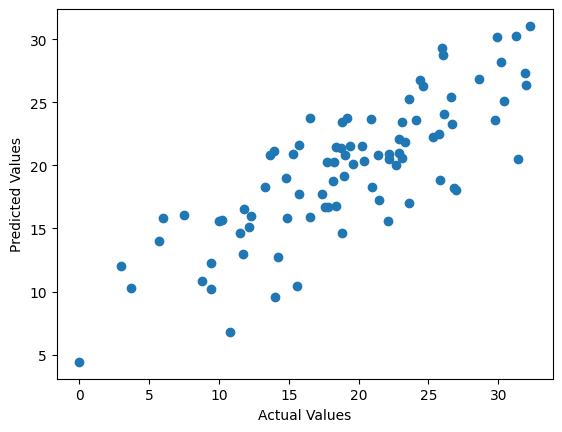

In [164]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [165]:
results_df = pd.DataFrame(
    {
        'Actual value' : y_test,
        'Predicted value' : y_pred,
        'Difference' : abs(y_test - y_pred)
    }
)
results_df

,Actual value,Predicted value,Difference
0,13.64,20.858431,7.218431
1,18.80,23.427984,4.627984
2,11.50,14.624535,3.124535
3,5.70,14.037632,8.337632
4,18.98,19.190606,0.210606
...,...,...,...
81,15.29,20.933850,5.643850
82,29.80,23.580959,6.219041
83,14.90,15.846630,0.946630
84,14.00,9.594675,4.405325
